In [1]:
import pandas as pd
import numpy as np
from utils import columns, clean_df, numerics, summary
from sklearn.linear_model import LinearRegression

60

### TODOS

1. Def "normalized-losses" + brief dataset description
2. EDA
3. Simple Regression Model (+Evaluation) (in progress)
4. PyCaret magic
5. Production Scenario

### Sources
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html#sphx-glr-auto-examples-model-selection-plot-cv-predict-py
- https://boostedml.com/2019/06/linear-regression-in-r-interpreting-summarylm.html
- https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
- https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c

In [2]:
%config Completer.use_jedi = False

In [3]:
df = pd.read_csv("data/imports-85.data", header=None, names=columns)
df = clean_df(df)
df.head(3)

In [6]:
# What are "normalized-losses"?

In [7]:
# 2. Simple Regression Model (base model)
# In our simple approach we'll consider continuous variables only
# NOTE: This is a non-production setup (no train & test sets here).
# So the focus is analysis and not prediction.

cols = list(df.columns)
target, num_features = cols[0], [c for c in cols[1:] if c in numerics]

X,y = df[num_features], np.log(df[target]) 
#X,y = pd.get_dummies(df[cols[1:]]),np.log(df[target])


In [8]:
#pd.get_dummies(df[cols[1:]])

In [9]:
model = LinearRegression().fit(X, y)

In [10]:
summary(model, X, y)

Call:
lm(formula = normalized-losses ~ wheel-base + length + width + height + curb-weight + engine-size + bore + stroke + compression-ratio + horsepower + peak-rpm + city-mpg + highway-mpg + price) 

                       Coefficients  Std. Error  t value  Pr(>|t|)
0         (Intercept)        8.1630       1.508    5.413     0.000
1          wheel-base       -0.0054       0.009   -0.604     0.547
2              length        0.0039       0.005    0.851     0.396
3               width       -0.0105       0.024   -0.445     0.657
4              height       -0.0585       0.012   -5.012     0.000
5         curb-weight        0.0001       0.000    0.787     0.432
6         engine-size        0.0018       0.002    1.113     0.267
7                bore       -0.1986       0.105   -1.889     0.061
8              stroke       -0.0909       0.076   -1.190     0.236
9   compression-ratio        0.0036       0.007    0.486     0.628
10         horsepower       -0.0014       0.002   -0.854     0.

<AxesSubplot:ylabel='Frequency'>

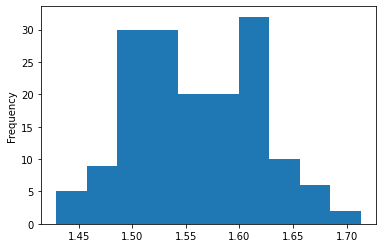

In [11]:
pd.Series(np.log(y)).plot.hist()

<AxesSubplot:ylabel='Frequency'>

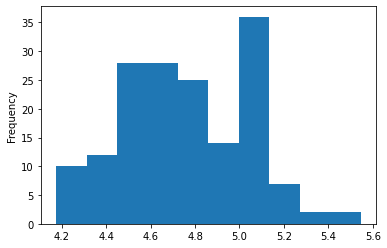

In [12]:
y.plot.hist()

In [13]:
type(model)

sklearn.linear_model._base.LinearRegression